<a href="https://colab.research.google.com/github/MOOwuttichai/Cancer_Social_Listening/blob/main/%E0%B9%80%E0%B9%80%E0%B8%A2%E0%B8%81%E0%B9%80%E0%B8%9E%E0%B8%A8%2B%E0%B9%80%E0%B9%80%E0%B8%A2%E0%B8%81%E0%B9%82%E0%B8%A3%E0%B8%84(%E0%B9%80%E0%B8%81%E0%B8%B7%E0%B8%AD%E0%B8%9A%E0%B8%AA%E0%B8%A1%E0%B8%9A%E0%B8%B9%E0%B8%A3%E0%B8%93%E0%B9%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install attacut
!pip install pythainlp
!pip install epitran

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56

In [ ]:
import pandas as pd
from google.colab import drive
from attacut import tokenize, Tokenizer
import pythainlp
from pythainlp import sent_tokenize, word_tokenize, Tokenizer
from pythainlp.util import normalize
from pythainlp.corpus.common import thai_words
from collections import OrderedDict
import matplotlib as mpl
drive.mount('/content/drive')

Mounted at /content/drive


#การวิเคราะห์ เเละ visualization ข้อมูล copyด้วยมือ

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Carbon/data/ดึงข้อมูลFacebook 2 - Sheet1.csv')

In [ ]:
comment=data.groupby('ชื่อ').sum().reset_index()

In [ ]:
words = set(thai_words())
words.remove("โรคมะเร็ง")
name =['กระเพาะปัสสวะ','กระเพาะปัสสาวะ','เยื่อบุโพรงมดลูก','ปากมดลูก','เม็ดเลือดขาว','กระเพาะอาหาร','กระเพราะอาหาร','ต่อมไทรอยด์','ต่อมไทยรอยด์','ท่อน้ำดี']
for i in name:
  words.add(i)
custom_tokenizer = Tokenizer(words)

In [ ]:
comment

,ชื่อ,คำพูดโรค
0,Akekapong Bowling Singharas,วิธีตรวจมะเร็ง ได้ที่ไหนบ้างครับนอกจาก รพ เจาะ...
1,Aliis Chattarika,Theboom Moungna
2,Alisa Chuasa,Jurairat Norasri. พงษ์นิวัฒน์ ชูอาษา
3,Amornrat Pollamuangdee,คลำเจอก้อนที่เต้านมค่ะ
4,Anothai Hassabut,คัดกรองเบื้องต้นด้วยการตรวจเต้านมด้วยตัวเองว่า...
...,...,...
276,แม่รุ้ง น้องเกล,ลูกสาวมีอาการปวดท้องแบบแน่นๆ เวียนหัว มีจุดจ้ำ...
277,แอนนี่ น้องข้าวโอ๊ต,Wanitchaya Puruean
278,แอม' มม มมมมมมม.,มีก้อนเนื้อที่เต้านม ไม่มีอาการเจ็บ แต่คลำๆแล้...
279,โบว์ คะ,จับนมแล้วเจอก้อน


##หาเพศ

In [ ]:
Genden = {'ชาย':['พ่อ','บิดา','พี่ชาย','น้องชาย','ลูกชาย','สามี','พัว','ผัว','ปู่','ตา','คุณปู่','คุณตา','คุณพ่อ','ปู่ทวด','ตาทวด','ลุง','อา','คุณอา','คุณลุง','หลายชาย','ลูกเขย','เขย','พี่เขย','น้องเขย','พ่อตา']
          ,'หญิง':['แม่','เเม่','มารดา','พี่สาว','น้องสาว','ลูกสาว','ภรรยา','เมีย','ย่า','ยาย','คุณย่า','คุณยาย','คุณเเม่','ย่าทวด','ยายทวด','ป้า','น้า่','คุณป้า','คุณน้า','หลายสาว','ลูกสะใถ้','ลูกสะใภ้','สะใภ้','พี่สะใภ้','น้องสะใภ้']}

In [ ]:
text= comment['คำพูดโรค'][1]
custom_tokenizer = Tokenizer(words)
Token = custom_tokenizer.word_tokenize(normalize(text))
Token.append('end')
Token

['Theboom', ' ', 'Moungna', 'end']

In [ ]:
Genden['หญิง'][2]

'มารดา'

In [ ]:
comment['คำพูดโรค'][0]

'วิธีตรวจมะเร็ง ได้ที่ไหนบ้างครับนอกจาก รพ เจาะเลือดไปตรวจได้ไหมครับ'

In [ ]:
new_colgenden=[]
for i in range(len(comment)):
  text= comment['คำพูดโรค'][i]
  custom_tokenizer = Tokenizer(words)
  Token = custom_tokenizer.word_tokenize(normalize(text))
  Token.append('end')
  list_genden = []
  for j in range(len(Genden['หญิง'])):
    for k in range(len(Token)):
      if (Token[k] == Genden['ชาย'][j]):
        list_genden.append('เพศชาย')
      elif(Token[k] == Genden['หญิง'][j]):
        list_genden.append('เพศหญิง')
  genden_list =[]
  genden_list = list(OrderedDict.fromkeys(list_genden)) # ลบคำซ้ำ
  #-------------------------------------------------------------------
  list_define_genden = []
  if len(genden_list) > 0 :
    if len(genden_list) == 2:
      list_define_genden.append('เล่าทั้งสองเพศ')
    elif len(genden_list)==1:
      list_define_genden.append(genden_list[0])
  elif len(genden_list)==0:
    list_define_genden.append('ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น')
  genden_list_de =[]
  genden_list_de = list(OrderedDict.fromkeys(list_define_genden))
  new_colgenden.append(genden_list_de[0])
print(new_colgenden)

['ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'เพศชาย', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'เพศหญิง', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได

In [ ]:
len(new_colgenden)

281

##หาโรค

In [ ]:
name_cancar = ['มะเร็งกระเพาะปัสสวะ','มะเร็งเยื่อบุโพรงมดลูก','มะเร็งปากมดลูก','มะเร็งเม็ดเลือดขาว','มะเร็งตับ','มะเร็งตับอ่อน','มะเร็งต่อมลูกหมาก','มะเร็งกระเพาะปัสสาวะ','มะเร็งกระเพาะอาหาร'
,'มะเร็งหลอดอาหาร','มะเร็งเต้านม','มะเร็งปากมดลูก','มะเร็งปอด','มะเร็งลำไส้ใหญ่','มะเร็งรังไข่','มะเร็งเม็ดเลือดขาว','มะเร็งช่องปาก','มะเร็งต่อมไทรอยด์','มะเร็งต่อมน้ำเหลือง','มะเร็งสมอง','มะเร็งผิวหนัง','มะเร็งลำไส้'
,'มะเร็งท่อน้ำดี']

In [ ]:
new_colcan = []
for i in range(len(comment)):#len(comment)
  text= comment['คำพูดโรค'][i]
  custom_tokenizer = Tokenizer(words)
  Token = custom_tokenizer.word_tokenize(normalize(text))
  Token.append('end')
  #หาโรค
  #--------------------------------------------------------
  list_cancer = []
  for i in range(len(Token)):
    if (Token[i] == "มะเร็ง")|(Token[i] == "โรคมะเร็ง"):
      list_cancer.append(Token[i]+Token[i+1])
    # else :
    #   list_cancer.append('ไม่สามารถระบุได้')
  unique_list = list(OrderedDict.fromkeys(list_cancer))
  #----------------------------------------------------------
  list_define_cancer = []
  new_list=[]
  for i in range(len(unique_list)):
    for j in range(len(name_cancar)):
      if unique_list[i]==name_cancar[j]:
        list_define_cancer.append(unique_list[i])
  #-----------------------------------------------------
  cancer_list_de2 =[]
  if len(list_define_cancer) > 0:
    if len(list_define_cancer) == 2:
      cancer_list_de2.append('เล่ามากกว่า 2 โรค')
    elif len(list_define_cancer)==1:
      cancer_list_de2.append(list_define_cancer[0])
  elif list_define_cancer==[]:
    cancer_list_de2.append('ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น')
  new_colcan.append(cancer_list_de2[0])
print(new_colcan)

['ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'เล่ามากกว่า 2 โรค', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'มะเร็งเต้านม', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'มะเร็งรังไข่', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่

In [ ]:
len(new_colcan)

281

In [ ]:
len(new_colgenden)

281

In [ ]:
use_data1 = comment[['ชื่อ','คำพูดโรค']]
use_data1['ประเภทของมะเร็ง'] = new_colcan
use_data1['เพศที่เป็นโรค'] = new_colgenden
use_data1

,ชื่อ,คำพูดโรค,ประเภทของมะเร็ง,เพศที่เป็นโรค
0,Akekapong Bowling Singharas,วิธีตรวจมะเร็ง ได้ที่ไหนบ้างครับนอกจาก รพ เจาะ...,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
1,Aliis Chattarika,Theboom Moungna,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
2,Alisa Chuasa,Jurairat Norasri. พงษ์นิวัฒน์ ชูอาษา,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น,เพศชาย
3,Amornrat Pollamuangdee,คลำเจอก้อนที่เต้านมค่ะ,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
4,Anothai Hassabut,คัดกรองเบื้องต้นด้วยการตรวจเต้านมด้วยตัวเองว่า...,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
...,...,...,...,...
276,แม่รุ้ง น้องเกล,ลูกสาวมีอาการปวดท้องแบบแน่นๆ เวียนหัว มีจุดจ้ำ...,เล่ามากกว่า 2 โรค,เพศหญิง
277,แอนนี่ น้องข้าวโอ๊ต,Wanitchaya Puruean,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
278,แอม' มม มมมมมมม.,มีก้อนเนื้อที่เต้านม ไม่มีอาการเจ็บ แต่คลำๆแล้...,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
279,โบว์ คะ,จับนมแล้วเจอก้อน,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น


##data visualization

In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # Ensuring matplotlib recognizes the font
mpl.rc('font', family='TH Sarabun New')

--2024-05-20 05:15:10--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2024-05-20 05:15:10--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2024-05-20 05:15:10 (5.84 MB/s) - ‘t

In [ ]:
cancer_counts1 = use_data1['ประเภทของมะเร็ง'].value_counts()
cancer_counts1

ประเภทของมะเร็ง
ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น    255
เล่ามากกว่า 2 โรค                      9
มะเร็งเต้านม                           4
มะเร็งปอด                              4
มะเร็งต่อมน้ำเหลือง                    3
มะเร็งลำไส้                            3
มะเร็งรังไข่                           1
มะเร็งผิวหนัง                          1
มะเร็งกระเพาะอาหาร                     1
Name: count, dtype: int64

<Axes: xlabel='ประเภทของมะเร็ง'>

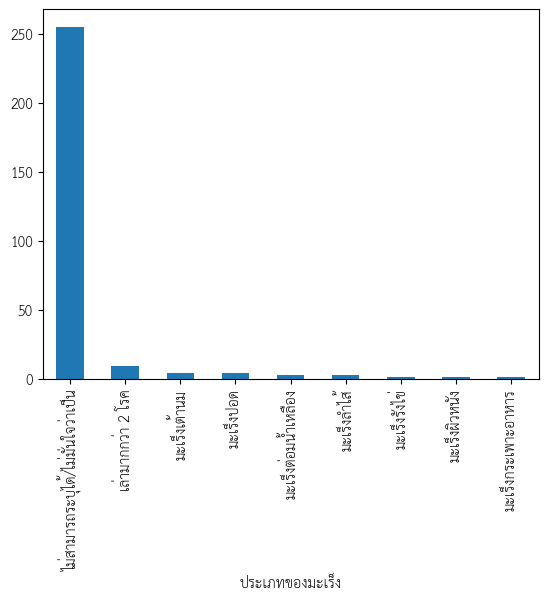

In [ ]:
use_data1['ประเภทของมะเร็ง'].value_counts().plot(kind='bar')

In [ ]:
use_data1[use_data1['ประเภทของมะเร็ง']=='มะเร็งกระเพาะอาหาร']

,ชื่อ,คำพูดโรค,ประเภทของมะเร็ง,เพศที่เป็นโรค
199,Zunggy Zoe,ปวดท้องแสบมากหลังทานข้าวทกครั้ง ท้องอืด ท้องบว...,มะเร็งกระเพาะอาหาร,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น


In [ ]:
use_data1[use_data1['ประเภทของมะเร็ง']=='มะเร็งเต้านม']

,ชื่อ,คำพูดโรค,ประเภทของมะเร็ง,เพศที่เป็นโรค
15,Asisah Kasor,มีก้อนที่เต้านมคะหลังจากเจอก็ไปหาหมอทันทีตอนแร...,มะเร็งเต้านม,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
180,Tusleema Nuengdithee,อ้วก เพลีย หายใจไม่เข้า ไม่อิ่ม\r\nหายใจเหนื่อ...,มะเร็งเต้านม,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
187,Waralak Petchrak,หายใจไม่อิ่ม นมบุ๋ม มะเร็งเต้านมระยะ1คะ,มะเร็งเต้านม,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
228,ปาร์ บิวตี้,เจอก่อนแข็งๆที่จักแร้ก่อนหน้าเจอก้อนก้อ อ่อนเพ...,มะเร็งเต้านม,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('ชื่อ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 9786 (\N{WHITE SMILING FACE}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('คำพูดโรค').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9786 (\N{WHITE SMILING FACE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.draw()
) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 9786 (\N{WHITE SMILING FACE}) missing from current font.
  plt.savefig(
/usr/local/lib/python3.10/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['คำพูดโรค'].value_counts()
    for x_label, grp in _df_2.groupby('ชื่อ')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ชื่อ')
_ = plt.ylabel('คำพูดโรค')

#การวิเคราะห์ เเละ visualization ข้อมูลที่ดึงด้วยโปรเเกรม

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Carbon/data/ข้อมูลที่ดึงด้วยcode.csv')

In [ ]:
comment=data.groupby('name').sum().reset_index()

In [ ]:
words = set(thai_words())
words.remove("โรคมะเร็ง")
name =['กระเพาะปัสสวะ','กระเพาะปัสสาวะ','เยื่อบุโพรงมดลูก','ปากมดลูก','เม็ดเลือดขาว','กระเพาะอาหาร','กระเพราะอาหาร','ต่อมไทรอยด์','ต่อมไทยรอยด์','ท่อน้ำดี']
for i in name:
  words.add(i)
custom_tokenizer = Tokenizer(words)

In [ ]:
comment

,name,comments
0,Akekapong Bowling Singharas,วิธีตรวจมะเร็ง ได้ที่ไหนบ้างครับนอกจาก รพ เจาะ...
1,Aliis Chattarika,Theboom Moungna
2,Alisa Chuasa,Jurairat Norasri. พงษ์นิวัฒน์ ชูอาษา
3,Amornrat Pollamuangdee,คลำเจอก้อนที่เต้านมค่ะ
4,Anothai Hassabut,คัดกรองเบื้องต้นด้วยการตรวจเต้านมด้วยตัวเองว่า...
...,...,...
276,แม่รุ้ง น้องเกล,ลูกสาวมีอาการปวดท้องแบบแน่นๆ เวียนหัว มีจุดจ้ำ...
277,แอนนี่ น้องข้าวโอ๊ต,Wanitchaya Puruean
278,แอม' มม มมมมมมม.,มีก้อนเนื้อที่เต้านม ไม่มีอาการเจ็บ แต่คลำๆแล้...
279,โบว์ คะ,จับนมแล้วเจอก้อน


##หาเพศ

In [ ]:
Genden = {'ชาย':['พ่อ','บิดา','คุณพ่อ','กระผม','พี่ชาย','น้องชาย','ลูกชาย','สามี','พัว','ผัว','ปู่','ตา','คุณปู่','คุณตา','คุณพ่อ','ปู่ทวด','ตาทวด','ลุง','อา','คุณอา','คุณลุง','หลายชาย','ลูกเขย','เขย','พี่เขย','น้องเขย','พ่อตา']
          ,'หญิง':['แม่','เเม่','มารดา','คุณเเม่','คุณแม่','พี่สาว','น้องสาว','ลูกสาว','ภรรยา','เมีย','ย่า','ยาย','คุณย่า','คุณยาย','คุณเเม่','ย่าทวด','ยายทวด','ป้า','น้า่','คุณป้า','คุณน้า','หลายสาว','ลูกสะใถ้','ลูกสะใภ้','สะใภ้','พี่สะใภ้','น้องสะใภ้']}

In [ ]:
text= comment['comments'][1]
custom_tokenizer = Tokenizer(words)
Token = custom_tokenizer.word_tokenize(normalize(text))
Token.append('end')
Token

['Theboom', ' ', 'Moungna', 'end']

In [ ]:
new_colgenden=[]
for i in range(len(comment)):
  text= comment['comments'][i]
  custom_tokenizer = Tokenizer(words)
  Token = custom_tokenizer.word_tokenize(normalize(text))
  Token.append('end')
  list_genden = []
  for j in range(len(Genden['หญิง'])):
    for k in range(len(Token)):
      if (Token[k] == Genden['ชาย'][j]):
        list_genden.append('เพศชาย')
      elif(Token[k] == Genden['หญิง'][j]):
        list_genden.append('เพศหญิง')
  genden_list =[]
  genden_list = list(OrderedDict.fromkeys(list_genden)) # ลบคำซ้ำ
  #-------------------------------------------------------------------
  list_define_genden = []
  if len(genden_list) > 0 :
    if len(genden_list) == 2:
      list_define_genden.append('เล่าทั้งสองเพศ')
    elif len(genden_list)==1:
      list_define_genden.append(genden_list[0])
  elif len(genden_list)==0:
    list_define_genden.append('ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น')
  genden_list_de =[]
  genden_list_de = list(OrderedDict.fromkeys(list_define_genden))
  new_colgenden.append(genden_list_de[0])
print(new_colgenden)

['ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'เพศชาย', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'เพศหญิง', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได

In [ ]:
len(new_colgenden)

281

##หาโรค

In [ ]:
name_cancar = ['มะเร็งกระเพาะปัสสวะ','มะเร็งเยื่อบุโพรงมดลูก','มะเร็งปากมดลูก','มะเร็งเม็ดเลือดขาว','มะเร็งตับ','มะเร็งตับอ่อน','มะเร็งต่อมลูกหมาก','มะเร็งกระเพาะปัสสาวะ','มะเร็งกระเพาะอาหาร'
,'มะเร็งหลอดอาหาร','มะเร็งเต้านม','มะเร็งปากมดลูก','มะเร็งปอด','มะเร็งลำไส้ใหญ่','มะเร็งรังไข่','มะเร็งเม็ดเลือดขาว','มะเร็งช่องปาก','มะเร็งต่อมไทรอยด์','มะเร็งต่อมน้ำเหลือง','มะเร็งสมอง','มะเร็งผิวหนัง','มะเร็งลำไส้'
,'มะเร็งท่อน้ำดี']

In [ ]:
new_colcan = []
for i in range(len(comment)):#len(comment)
  text= comment['comments'][i]
  custom_tokenizer = Tokenizer(words)
  Token = custom_tokenizer.word_tokenize(normalize(text))
  Token.append('end')
  #หาโรค
  #--------------------------------------------------------
  list_cancer = []
  for i in range(len(Token)):
    if (Token[i] == "มะเร็ง")|(Token[i] == "โรคมะเร็ง"):
      list_cancer.append(Token[i]+Token[i+1])
    # else :
    #   list_cancer.append('ไม่สามารถระบุได้')
  unique_list = list(OrderedDict.fromkeys(list_cancer))
  #----------------------------------------------------------
  list_define_cancer = []
  new_list=[]
  for i in range(len(unique_list)):
    for j in range(len(name_cancar)):
      if unique_list[i]==name_cancar[j]:
        list_define_cancer.append(unique_list[i])
  #-----------------------------------------------------
  cancer_list_de2 =[]
  if len(list_define_cancer) > 0:
    if len(list_define_cancer) == 2:
      cancer_list_de2.append('เล่ามากกว่า 2 โรค')
    elif len(list_define_cancer)==1:
      cancer_list_de2.append(list_define_cancer[0])
  elif list_define_cancer==[]:
    cancer_list_de2.append('ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น')
  new_colcan.append(cancer_list_de2[0])
print(new_colcan)

['ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'เล่ามากกว่า 2 โรค', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'มะเร็งเต้านม', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'มะเร็งรังไข่', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น', 'ไม่สามารถระบุได้/ไม่

In [ ]:
len(new_colcan)

281

In [ ]:
len(new_colgenden)

281

In [ ]:
use_data2 = comment[['name','comments']]
use_data2['ประเภทของมะเร็ง'] = new_colcan
use_data2['เพศที่เป็นโรค'] = new_colgenden
use_data2

,name,comments,ประเภทของมะเร็ง,เพศที่เป็นโรค
0,Akekapong Bowling Singharas,วิธีตรวจมะเร็ง ได้ที่ไหนบ้างครับนอกจาก รพ เจาะ...,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
1,Aliis Chattarika,Theboom Moungna,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
2,Alisa Chuasa,Jurairat Norasri. พงษ์นิวัฒน์ ชูอาษา,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น,เพศชาย
3,Amornrat Pollamuangdee,คลำเจอก้อนที่เต้านมค่ะ,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
4,Anothai Hassabut,คัดกรองเบื้องต้นด้วยการตรวจเต้านมด้วยตัวเองว่า...,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
...,...,...,...,...
276,แม่รุ้ง น้องเกล,ลูกสาวมีอาการปวดท้องแบบแน่นๆ เวียนหัว มีจุดจ้ำ...,เล่ามากกว่า 2 โรค,เพศหญิง
277,แอนนี่ น้องข้าวโอ๊ต,Wanitchaya Puruean,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
278,แอม' มม มมมมมมม.,มีก้อนเนื้อที่เต้านม ไม่มีอาการเจ็บ แต่คลำๆแล้...,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
279,โบว์ คะ,จับนมแล้วเจอก้อน,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น


##data visualization

In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # Ensuring matplotlib recognizes the font
mpl.rc('font', family='TH Sarabun New')

--2024-05-20 05:24:56--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2024-05-20 05:24:57--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf.1’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.02s   

2024-05-20 05:24:57 (6.18 MB/s) - 

In [ ]:
cancer_counts2 = use_data2['ประเภทของมะเร็ง'].value_counts()
cancer_counts2

ประเภทของมะเร็ง
ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น    256
เล่ามากกว่า 2 โรค                      8
มะเร็งปอด                              4
มะเร็งเต้านม                           3
มะเร็งต่อมน้ำเหลือง                    3
มะเร็งลำไส้                            3
มะเร็งกระเพาะอาหาร                     2
มะเร็งรังไข่                           1
มะเร็งผิวหนัง                          1
Name: count, dtype: int64

<Axes: xlabel='ประเภทของมะเร็ง'>

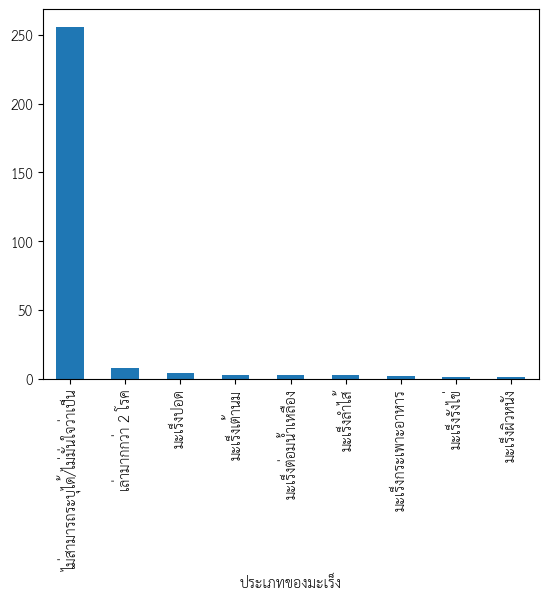

In [ ]:
use_data2['ประเภทของมะเร็ง'].value_counts().plot(kind='bar')

In [ ]:
use_data2[use_data2['ประเภทของมะเร็ง']=='มะเร็งกระเพาะอาหาร']

,name,comments,ประเภทของมะเร็ง,เพศที่เป็นโรค
123,Pimpitcha Tpy,มะเร็งกระเพาะอาหารระยะ2ไป3ของคุณแม่: อาการ อาห...,มะเร็งกระเพาะอาหาร,เพศหญิง
199,Zunggy Zoe,ปวดท้องแสบมากหลังทานข้าวทกครั้ง ท้องอืด ท้องบว...,มะเร็งกระเพาะอาหาร,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น


In [ ]:
use_data2[use_data2['ประเภทของมะเร็ง']=='มะเร็งเต้านม']

,name,comments,ประเภทของมะเร็ง,เพศที่เป็นโรค
15,Asisah Kasor,มีก้อนที่เต้านมคะหลังจากเจอก็ไปหาหมอทันทีตอนแร...,มะเร็งเต้านม,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
187,Waralak Petchrak,หายใจไม่อิ่ม นมบุ๋ม มะเร็งเต้านมระยะ1คะ,มะเร็งเต้านม,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น
228,ปาร์ บิวตี้,เจอก่อนแข็งๆที่จักแร้ก่อนหน้าเจอก้อนก้อ อ่อนเพ...,มะเร็งเต้านม,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น


In [ ]:
use_data2[use_data2['name']=='Tusleema Nuengdithee']

,name,comments,ประเภทของมะเร็ง,เพศที่เป็นโรค
180,Tusleema Nuengdithee,อ้วก เพลีย หายใจไม่เข้า ไม่อิ่มหายใจเหนื่อยเจ็...,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น,ไม่สามารถระบุได้/ไม่มั่นใจว่าเป็น


In [ ]:
te

หายใจไม่อิ่มอาการเริ่มต้นของเล็กอีกอย่างก็คือ มีเหงื่อออกที่มือตอนกลางเล็กมีอาการชาขา+ชารอบก้นด้วยค่าเล็กมีการคันตามตัว เหมือนเป็นลมพิษ กินยาแก้แพ้ก็หาย แต่ก็เป็นบ่อยมากคันตามตัว นอนไม่หลับ เหงือออกกลางคืนTheboom MoungnaJurairat Norasri. พงษ์นิวัฒน์ ชูอาษาคลำเจอก้อนที่เต้านมค่ะคัดกรองเบื้องต้นด้วยการตรวจเต้านมด้วยตัวเองว่ามีก้อนไมปอ สรรสวัสดิ์Preephawat Phawatpokhinมะเร็งแต่ละอาการไม่เหมือนกันค่ะ แต่มีเลือดออกมาเหมือนกันค่ะแฟนปวดท้องอาการเดียวกับกรดไหลย้อน แล้วมีอาการไอแห้งร่วมด้วยค่ะผมพูดตามความจริงที่เจอนะครับ มะเร็งปากมดลูกของแม่ผมไม่มีอาการที่บ่งบอกได้ชัดว่ากำลังเป็นมะเร็ง มามีอาการอีกทีก็ระยะสุดท้ายและแล้วมันก็พรากแม่ผมไป แนะนำให้ทุกคนตรวจสุขภาพทุกปีนะครับแค่ไทรอยด์อักเสบ จนตอนนี้ตัดทิ้งทั้งสองข้าง เพราะเป็นมะเร็งทั้งสองข้าง และลามไปที่ต่อมน้ำเหลือง ตอนนี้อยู่ในกระบวนการรักษา .Pakphoom Chaipinidมาอ่านท่านใดพอทราบไหมคะว่าเราสามารถทำประกันอะไรไว้ได้ ในขณะที่ยังตรวจไม่เจอแต่รู้สึกมีความเสี่ยง ￼ว่าพี่Pimnaphat Khampitoolมีก้อนที่เต้านมคะหลังจากเจอก็ไปหาหมอทันทีตอนแรกกลัวเหมือนกันคะผลอ